In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Anatomy of a figure

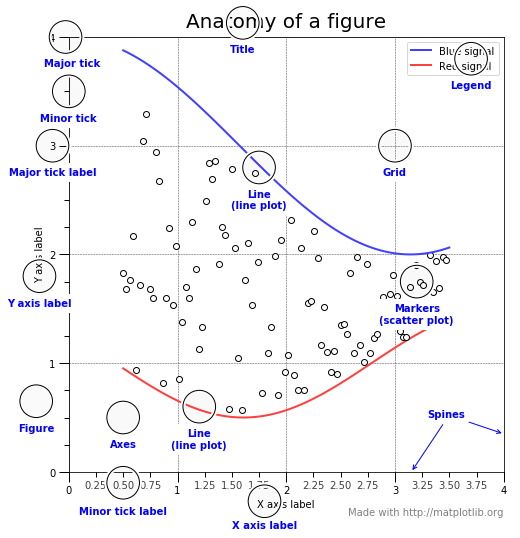

In [3]:
hide_me
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')


Plot above taken from https://matplotlib.org/examples/showcase/anatomy.html

When making a plot there are four parts we need to consider:

- the **Figure**, which contains all axes and artists
- the **Axes**, where the plots are drawn.
- the **Axis**, which contains the spines and ticks and takes care of the graph limits
- the **Artists**, that draw everything on the canvas

# Coding styles

#### Data

In [ ]:
X = np.linspace(0, 2*np.pi)

There are two basic styles when using matplotlib: The *pyplot* and *object-oriented* coding style.
Both have their pros and cons.

### pyplot

    + Easy to use for quick and dirty plotting
    - Can become unreadable, when plots become complex
    - Some properties need to be set by finding the current figure/axes via special funtions

In [ ]:
plt.plot(X, np.sin(X))  # Easy
plt.plot(X, np.cos(X))
plt.xlim(0, 2*np.pi)
ax = plt.gca()          # I don't really like that
ax.set_aspect(1)
fig = plt.gcf()
fig.set_figwidth(8)
fig.set_figheight(4)

### object-oriented

    + Good readability
    + Maintanance of complex plots is easier

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, np.sin(X))
ax.plot(X, np.cos(X))
ax.set_xlim(0, 2*np.pi)
ax.set_aspect(1)

This approach makes it easy to have many axes in one figure:

# Multiple of plots in one figure

Setting up grids of plots can be done in several ways. Less complex plots can be created with `plt.subplots`:

#### Data

In [ ]:
df = 10
X = np.linspace(0, 50, num=500)
Y = np.exp(-X/df) * np.sin(X)
Z = np.exp(-X/df) * np.cos(X)

#### Plot

In [ ]:
plot_data = [[X, X], [X, Y],[X, Z],[Y, Z]]

# 2x2

More complex plots can be created with a `GridSpec` instance. When creating the object one has to specify the number of rows and columns the grid has. Later one can use the gridSpec to add axes and specify where they should be placed on the grid and how many columns they should span.

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
fig = plt.figure()

# fig.tight_layout()

In [ ]:
wr = [1,1,2]
hr = [2,1,1]
gs = gridspec.GridSpec(3,3, width_ratios=wr, height_ratios=hr)
slices = [[0, 0, 1], [0, 1, 1], [0, 2, 1],
          [1, 0, 2],[1, 2, 1],
          [2, 0, 3]]

for x, y, y_sp in slices:
    ax = plt.subplot(gs[x, y:y+y_sp])
    ax.plot(X, Y)
    ax.set_title('gs[{}, {}:{}]'.format(x, y, y+y_sp))
fig = plt.gcf().tight_layout()

### Nested grids

In [ ]:
outer_grid = gridspec.GridSpec(1,2, width_ratios=[1,1.5])
outer_grid.update(wspace=0.3)

inner_1 = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec=outer_grid[0], wspace=0, hspace=0.2)
inner_2 = gridspec.GridSpecFromSubplotSpec(3,1, subplot_spec=outer_grid[1], hspace=0.35)
inner_21 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=inner_2[-1], wspace=0)
all_specs = [inner_1, inner_2, inner_21]

def reussable_plot(ax, title):
    ax.plot(X, Y)
    if not ax.is_first_col():
        ax.set_yticks([])
    if not ax.is_last_row():
        ax.set_xticks([])
    else:
        ax.set_xticks([0, 20, 40])
    ax.set_title(title)

fig = plt.figure()
fig.suptitle('Nested Plots')
for i, spec in enumerate(all_specs):
    for j, gs in enumerate(spec):
            title = '{}, {}'.format(i, j)
            if i == 2:
                title = '1, 2, {}'.format(j)
                
            if not (i == 1 and j == 2):
                ax = fig.add_subplot(gs)
                reussable_plot(ax, title)